# Preprocessing of Text for Analysis Purposes

## Import filtered dataframe

In [1]:
import pandas as pd

df = pd.read_json('../raw_data/df_all_clean.json')

In [2]:
pd.set_option("display.max_rows", None)

In [3]:
df

,full_transcript,artist,show_name,year,source
0,[rock music playing]\n\n[indistinct chatter]\n...,Adam Devine,Best Time Of Our Lives,2019.0,Scraps from the Loft
1,"strong language. CHEERING Yes, yes, yes! How...",Adam Hess,Live from the BBC,2016.0,BBC
2,"Ladies and gentlemen, please welcome your hos...",Adam Hills,Live at the Apollo Series 9 Episode 4,2013.0,BBC
3,some strong language and adult humour Ladies...,Adam Hills,Live at the Apollo Series 12 Episode 4,2016.0,BBC
4,"? CHEERING Hello, Apollo. I am going to start ...",Adam Hills,Live at the Apollo Series 5 Episode 5,2009.0,BBC
5,"[man] Okay, ready, and… Take your own cue, Ada...",Adam Sandler,100% Fresh,2018.0,Scraps from the Loft
6,A NETFLIX COMEDY SPECIAL\nRecorded at the Casi...,Adel Karam,Live From Beirut,2018.0,Scraps from the Loft
7,"! APPLAUSE AND CHEERING Hello! Hello, The Apol...",Aisling Bea,Live at the Apollo Series 10 Episode 3,2014.0,BBC
8,[dog barks] [FisherGreen’s Sisters Brothers pl...,Al Madrigal,Why Is The Rabbit Crying?,2013.0,Scraps from the Loft
9,"Ladies and gentlemen, please welcome your hos...",Al Murray,Live at the Apollo Series 4 Episode 2,2008.0,BBC


## Cleaning Functions

In [4]:
### Imports
import string
import re 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [5]:
### Specific functions to standup/scraps from the loft
def remove_music(text):
    text = re.sub('♪.*?♪', '', text) # remove ♪ stuff that looks like this ♪
    return text

def remove_bracketed(text):
    text = re.sub('\[.*?\]', '', text) # remove [stuff that looks like this]
    text = re.sub('\(.*?\)', '', text) # remove (stuff that looks like this)
    return text

def remove_useless(text):
    text = re.sub('\n\w+\(\s\w+\)?\:\s', '', text) # remove Word: or Word word: with a newline before
    text = re.sub('subtitles? by \w+', '', text) # remove subtile(s) by xxxx
    return text

In [6]:
# general functions for text pre-processing
def remove_punc(text, chars):
    txt = text
    for punc in chars:
        txt = txt.replace(punc, '')
    return txt

def remove_num(text):
    return ''.join(char for char in text if not char.isdigit())

def remove_stopw(text, word_list):
    word_tokens = word_tokenize(text)
    return ' '.join(w for w in word_tokens if not w in word_list)

def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join(lemmatizer.lemmatize(word) for word in text.split(' '))

## Modifying & applying removal lists 

In [7]:
clean_df = df.copy()

### Remove everything in Brackets, Music notes

In [8]:
clean_df['full_transcript_clean'] = clean_df['full_transcript'].apply(remove_bracketed)

In [9]:
## TODO: Remove ♪ from specific comedians:
# [Bo Burnham]

In [10]:
# clean_df['full_transcript_clean'] = clean_df['full_transcript'].apply(remove_music)

### Lowercase, remove useless regex matches, numbers, stopwords and punctuation
Including specific scraps format

In [11]:
clean_df['full_transcript_clean'] = clean_df['full_transcript_clean'].str.lower()

In [12]:
clean_df['full_transcript_clean'] = clean_df['full_transcript_clean'].apply(remove_useless)

In [13]:
words_to_remove = ['thank', 'cheering', 'recorded', 'applause', 'laughter', 'laughing', 'murmuring', 'chatter',
                       'aired', 'filmed', 'ladies', 'gentlemen', 'thats', 'im', 'dont', 'know', 'right', 'got',
                   'go', 'think', 'one', 'said', 'na']
# other possible removals 'netflix special', 'full transcript' 

In [14]:
stopwords_plus = words_to_remove + stopwords.words('english')

In [15]:
clean_df['full_transcript_clean'] = clean_df['full_transcript_clean'].apply(remove_num)

In [16]:
clean_df['full_transcript_clean'] = clean_df['full_transcript_clean'].apply(remove_stopw, args=(stopwords_plus,))

In [17]:
punc_added = string.punctuation + '“”‘’…♪'

clean_df['full_transcript_clean'] = clean_df['full_transcript_clean'].apply(remove_punc, args=(punc_added,))

### Remove numbers and stopwords + common comedy words

In [18]:
clean_df

,full_transcript,artist,show_name,year,source,full_transcript_clean
0,[rock music playing]\n\n[indistinct chatter]\n...,Adam Devine,Best Time Of Our Lives,2019.0,Scraps from the Loft,hey man let hey everybody yeah ...
1,"strong language. CHEERING Yes, yes, yes! How...",Adam Hess,Live from the BBC,2016.0,BBC,strong language yes yes yes well hello ...
2,"Ladies and gentlemen, please welcome your hos...",Adam Hills,Live at the Apollo Series 9 Episode 4,2013.0,BBC,please welcome host tonight hello london ...
3,some strong language and adult humour Ladies...,Adam Hills,Live at the Apollo Series 12 Episode 4,2016.0,BBC,strong language adult humour please welcome h...
4,"? CHEERING Hello, Apollo. I am going to start ...",Adam Hills,Live at the Apollo Series 5 Episode 5,2009.0,BBC,hello apollo going start saying something v...
5,"[man] Okay, ready, and… Take your own cue, Ada...",Adam Sandler,100% Fresh,2018.0,Scraps from the Loft,okay ready and take cue adam action dan ...
6,A NETFLIX COMEDY SPECIAL\nRecorded at the Casi...,Adel Karam,Live From Beirut,2018.0,Scraps from the Loft,netflix comedy special casino du liban beirut...
7,"! APPLAUSE AND CHEERING Hello! Hello, The Apol...",Aisling Bea,Live at the Apollo Series 10 Episode 3,2014.0,BBC,hello hello apollo well oh m delighted ...
8,[dog barks] [FisherGreen’s Sisters Brothers pl...,Al Madrigal,Why Is The Rabbit Crying?,2013.0,Scraps from the Loft,ii – please give warm welcome mr ii – happen...
9,"Ladies and gentlemen, please welcome your hos...",Al Murray,Live at the Apollo Series 4 Episode 2,2008.0,BBC,please welcome host tonight pub landlord w...


In [19]:
full_transcripts = ' '.join(clean_df['full_transcript_clean'])

In [20]:
len(full_transcripts)

10783203

In [21]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [22]:
# Import packages
import numpy as np
from PIL import Image
# Import image to np.array
mask = np.array(Image.open('../images/rofl.png'))

In [23]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(30, 20))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [24]:
mask_colors = ImageColorGenerator(mask)

In [25]:
word_cloud = WordCloud(width=3000, 
                       height=2000, 
                       random_state=1, 
                       collocations=False, 
                       stopwords = STOPWORDS,
                       background_color="white", 
                       mask=mask, 
                       color_func=mask_colors)

In [26]:
word_cloud.generate(full_transcripts)

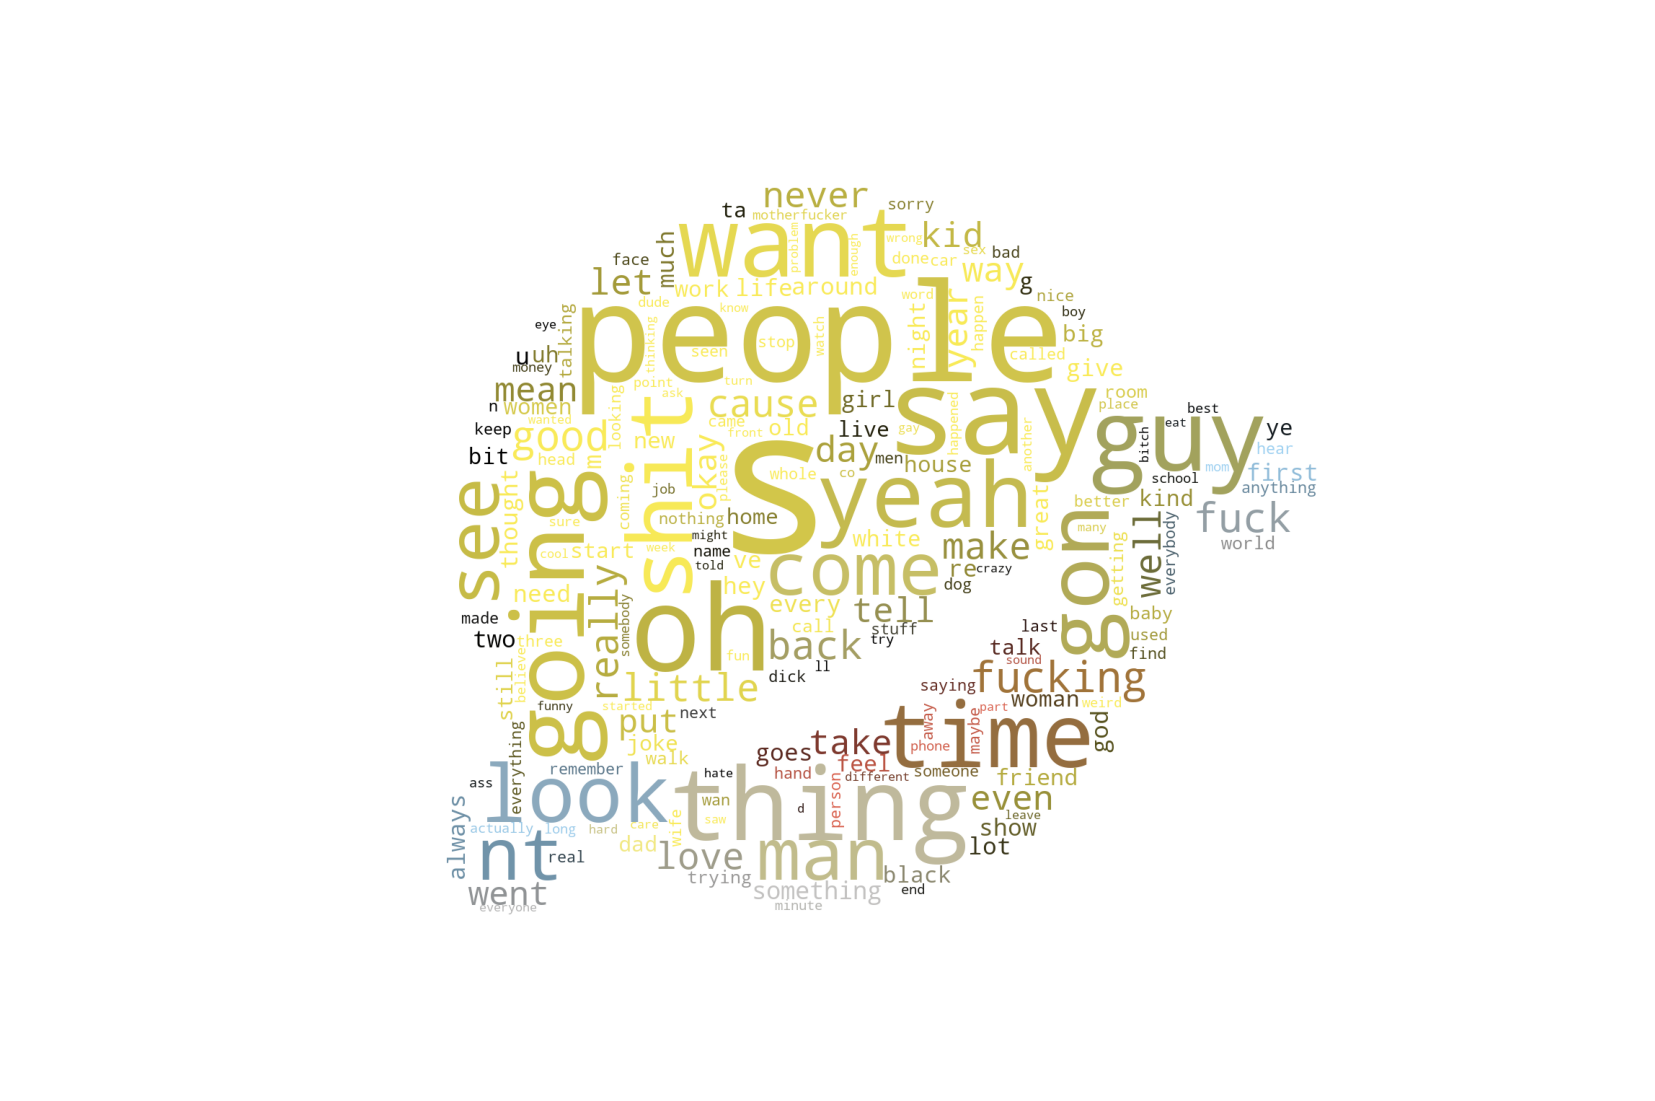

In [27]:
plot_cloud(word_cloud)

In [29]:
word_cloud.to_file("../images/wordcloudrofl.png")